 ## CSC6621 - Final project - Team E-302
### Human activity recognition using Smartphones

The dataset includes the following files:
=========================================

- 'README.txt'

- 'features_info.txt': Shows information about the variables used on the feature vector.

- 'features.txt': List of all features.

- 'activity_labels.txt': Links the class labels with their activity name.

- 'train/X_train.txt': Training set.

- 'train/y_train.txt': Training labels.

- 'test/X_test.txt': Test set.

- 'test/y_test.txt': Test labels.

The following files are available for the train and test data. Their descriptions are equivalent. 

- 'train/subject_train.txt': Each row identifies the subject who performed the activity for each window sample. Its range is from 1 to 30. 

- 'train/Inertial Signals/total_acc_x_train.txt': The acceleration signal from the smartphone accelerometer X axis in standard gravity units 'g'. Every row shows a 128 element vector. The same description applies for the 'total_acc_x_train.txt' and 'total_acc_z_train.txt' files for the Y and Z axis. 

- 'train/Inertial Signals/body_acc_x_train.txt': The body acceleration signal obtained by subtracting the gravity from the total acceleration. 

- 'train/Inertial Signals/body_gyro_x_train.txt': The angular velocity vector measured by the gyroscope for each window sample. The units are radians/second. 

Notes: 
======
- Features are normalized and bounded within [-1,1].
- Each feature vector is a row on the text file.
- The units used for the accelerations (total and body) are 'g's (gravity of earth -> 9.80665 m/seg2).
- The gyroscope units are rad/seg.
- A video of the experiment including an example of the 6 recorded activities with one of the participants can be seen in the following link: http://www.youtube.com/watch?v=XOEN9W05_4A

In [1]:
#pip install kagglehub scikit-learn tensorflow pandas numpy matplotlib seaborn xgboost

In [2]:
### Import Statements

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import kagglehub
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

c:\Users\hudos\CSC 6621 - Applied ML\Final Project\CSC6621-Final-project-E302\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = kagglehub.dataset_download("uciml/human-activity-recognition-with-smartphones")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\hudos\.cache\kagglehub\datasets\uciml\human-activity-recognition-with-smartphones\versions\2


In [4]:
df_train=pd.read_csv(path+'/train.csv')

In [5]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
from sklearn import preprocessing

In [7]:
encoder=preprocessing.LabelEncoder()

In [8]:
X=pd.DataFrame(df_train.drop(['Activity','subject'],axis=1))
y=df_train.Activity.values.astype(object)

In [9]:
#Total Number of Continous and Categorical features in the training set
num_cols = X._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 561


In [10]:
encoder.fit(y)
y=encoder.transform(y)
y.shape

(7352,)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

# Baseline Model #1 - SVM

In [12]:

# import SVC classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# import metrics to compute accuracy (Evulate)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [13]:
svc=SVC()
svc.fit(X_train,y_train)


SVC()

In [14]:
y_pred=svc.predict(X_test)

In [15]:
print("Accuracy of SVC classifier on test set: {:.2f}".format(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))

Accuracy of SVC classifier on test set: 0.97
[[291   0   0   0   0   0]
 [  1 218  26   0   0   1]
 [  0  19 262   0   0   0]
 [  0   0   0 242   0   1]
 [  0   0   0   1 206   0]
 [  0   0   0   1   1 201]]


### Calculated SVM accuracy = 97% 

# Baseline Model #2 - MLP for multi class - classification problem

c:\Users\hudos\CSC 6621 - Applied ML\Final Project\CSC6621-Final-project-E302\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5438 - loss: 1.0209 - val_accuracy: 0.8878 - val_loss: 0.2798
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8771 - loss: 0.3026 - val_accuracy: 0.9252 - val_loss: 0.1941
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9144 - loss: 0.2263 - val_accuracy: 0.9463 - val_loss: 0.1373
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9357 - loss: 0.1588 - val_accuracy: 0.9456 - val_loss: 0.1253
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9469 - loss: 0.1458 - val_accuracy: 0.9490 - val_loss: 0.1271
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9458 - loss: 0.1371 - val_accuracy: 0.9524 - val_loss: 0.1083
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9530 - loss: 0.1118 - val_accuracy: 0.9558 - val_loss: 0.1092
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9582 - loss: 0.1078 - val_accuracy: 0

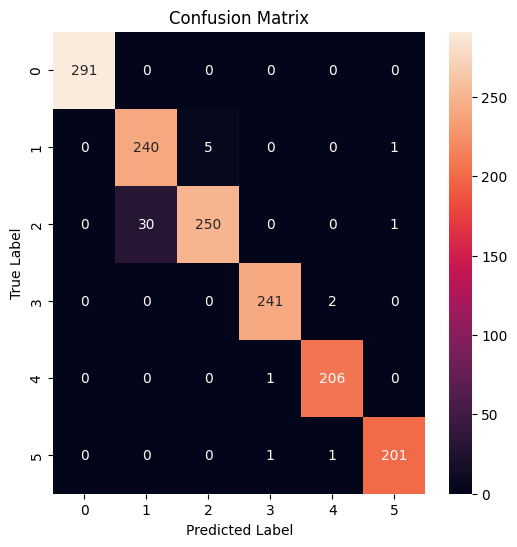

In [16]:
########################################################### Encoding labels ####################################################
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
########################################################### one-hot encoding ###############################################
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)
####################2-layer feedforward neural network (MLP) with ReLU activations and dropout regularization, #######################
###################### trained using categorical crossentropy loss for a multi-class classification task.########################################
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))  # helps reduce overfitting
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))

################################################## MODEL COMPILATION #########################################################
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # because we're using one-hot labels
              metrics=['accuracy'])

######################################################### TRAINING ##############################################################
history = model.fit(X_train, y_train_cat,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test_cat))

################################################# PERFORMANCE EVAL ################################################################
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")

########################################### PRINTING CLASSIFICATION REPORT #########################################################
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
print(classification_report(y_test_encoded, y_pred_labels, target_names=[str(cls) for cls in encoder.classes_]))
############################################ PRINTING THE CONFUSION MATRIX ###################################################
conf_matrix = confusion_matrix(y_test_encoded, y_pred_labels)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

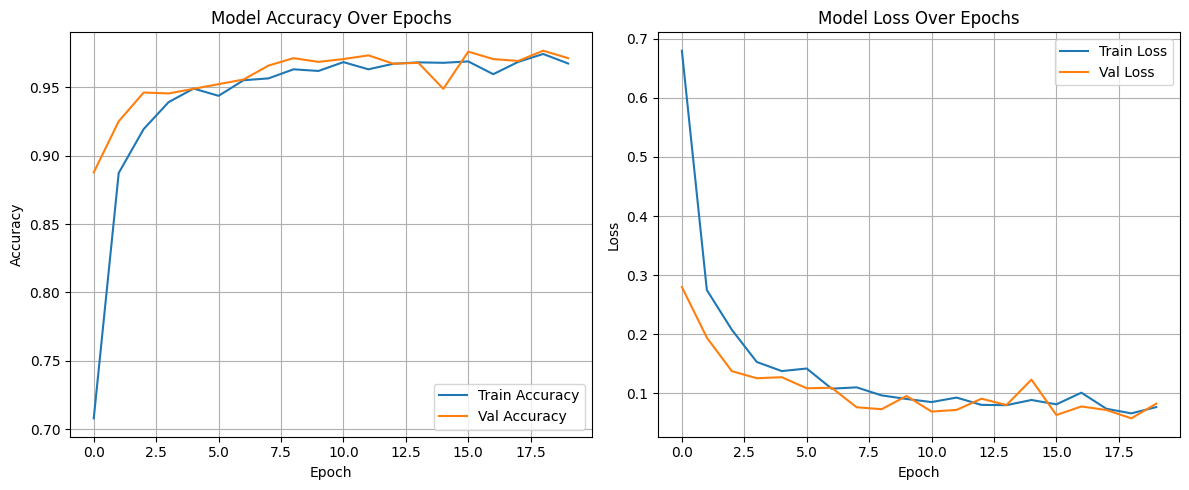

In [17]:
# Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


##  Model #2 Accuracy (Plot on the left)
##### Training Accuracy steadily increases and plateaus around 97%.
##### Validation Accuracy follows a similar trend and ends very close to training accuracy (~97.5%)
### Conclusion 
##### High and consistent accuracy on both datasets suggests a well-tuned architecture for the classification problem.

## Model Loss (Plot on the right)
##### Training Loss decreases sharply and flattens, which is expected.
##### Validation Loss also drops and stabilizes similarly, no late-stage spikes.\
### Conclusion 
##### Low and decreasing loss on both training and validation sets further confirms that:
##### The model is learning effectively.
##### There's no sign of underfitting (where both losses remain high).
##### There's no overfitting (where val loss would increase while train loss drops).

In [18]:
#pip install xgboost

# 

### Model 3 - Gradient Boosted Trees

The reasoning behind using gradient boosted trees as our 3rd algorithm is that preforms very well on structured tabular data, such as this Human Activity Dataset. It is also great for multi-classification problems, which is what we are doing by trying to distinguish between walking, standing, resting, etc. As a bonus XGBoost contains built in L1 and L2 Regularization which lowers the chance for overfitting

In [19]:
class_mapping = {
    0: "Walking",
    1: "Walking Upstairs",
    2: "Walking Downstairs",
    3: "Sitting",
    4: "Standing",
    5: "Laying"
}

In [20]:
from xgboost import XGBClassifier

In [21]:
# Let's reset the data, knowing we have a fresh model

encoder=preprocessing.LabelEncoder()
X=pd.DataFrame(df_train.drop(['Activity','subject'],axis=1))
y=df_train.Activity.values.astype(object)
num_cols = X._get_numeric_data().columns
encoder.fit(y)
y=encoder.transform(y)
y.shape
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

In [22]:
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [23]:
n_classes = len(np.unique(y_train_encoded))
n_classes # Just making sure 

6

In [24]:
xgb_model_shallow = XGBClassifier(
    objective='multi:softprob',  # Multiclass classification
    num_class=n_classes,
    eval_metric=['mlogloss', 'merror'],
    use_label_encoder=False, # Recommend to manually Label using LabelEncoder
    n_estimators=100,  # Number of trees
    max_depth=2,  # Maximum depth of a tree
    random_state=42
)

In [25]:
xgb_model_deep = XGBClassifier(
    objective='multi:softprob',  # Multiclass classification
    num_class=n_classes,
    eval_metric=['mlogloss', 'merror'],
    use_label_encoder=False, # Recommend to manually Label using LabelEncoder
    n_estimators=100,  # Number of trees
    max_depth=6,  # Maximum depth of a tree
    random_state=42
)

In [26]:
xgb_model_less_trees = XGBClassifier(
    objective='multi:softprob',  # Multiclass classification
    num_class=n_classes,
    eval_metric=['mlogloss', 'merror'],
    use_label_encoder=False, # Recommend to manually Label using LabelEncoder
    n_estimators=5,  # Number of trees
    max_depth=2,  # Maximum depth of a tree
    random_state=42
)

In [27]:
xgb_model_shallow.fit(
    X_train, y_train_encoded,
    eval_set=[(X_train, y_train_encoded), (X_test, y_test_encoded)],
    verbose=False
)

c:\Users\hudos\CSC 6621 - Applied ML\Final Project\CSC6621-Final-project-E302\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [23:05:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['mlogloss', 'merror'],
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=6, ...)

In [28]:
xgb_model_deep.fit(
    X_train, y_train_encoded,
    eval_set=[(X_train, y_train_encoded), (X_test, y_test_encoded)],
    verbose=False
)

c:\Users\hudos\CSC 6621 - Applied ML\Final Project\CSC6621-Final-project-E302\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [23:05:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['mlogloss', 'merror'],
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=6, ...)

In [29]:
xgb_model_less_trees.fit(
    X_train, y_train_encoded,
    eval_set=[(X_train, y_train_encoded), (X_test, y_test_encoded)],
    verbose=False
)

c:\Users\hudos\CSC 6621 - Applied ML\Final Project\CSC6621-Final-project-E302\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [23:06:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['mlogloss', 'merror'],
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None, num_class=6, ...)

In [30]:
y_pred_prob_shallow = xgb_model_shallow.predict_proba(X_test)
y_pred_labels_shallow = np.argmax(y_pred_prob_shallow, axis=1)

y_pred_prob_deep = xgb_model_deep.predict_proba(X_test)
y_pred_labels_deep = np.argmax(y_pred_prob_deep, axis=1)

y_pred_prob_less_trees = xgb_model_less_trees.predict_proba(X_test)
y_pred_labels_less_trees = np.argmax(y_pred_prob_less_trees, axis=1)

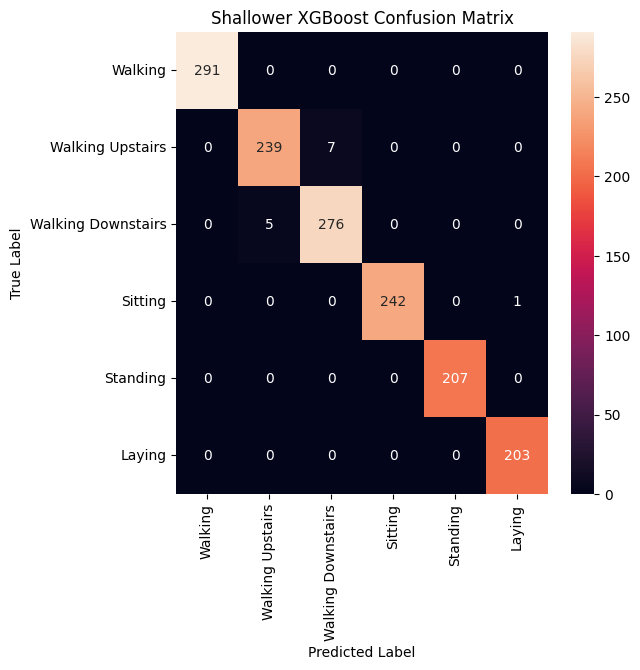

In [31]:
# Confusion matrix for Shallow Tree
conf_matrix_shallow = confusion_matrix(y_test_encoded, y_pred_labels_shallow)
plt.figure(figsize=(6,6))
labels = [class_mapping[i] for i in range(len(class_mapping))]
sns.heatmap(conf_matrix_shallow, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title("Shallower XGBoost Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

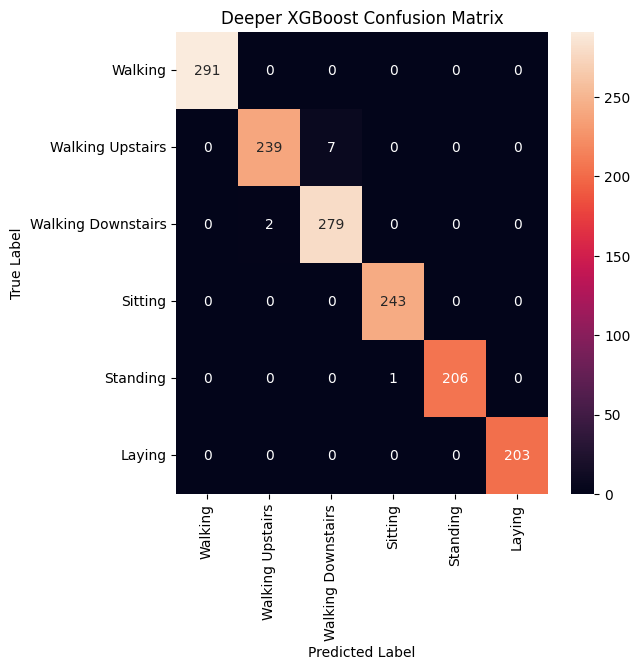

In [32]:
# Confusion matrix for Deeper Tree
conf_matrix_deep = confusion_matrix(y_test_encoded, y_pred_labels_deep)
plt.figure(figsize=(6,6))
labels = [class_mapping[i] for i in range(len(class_mapping))]
sns.heatmap(conf_matrix_deep, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title("Deeper XGBoost Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

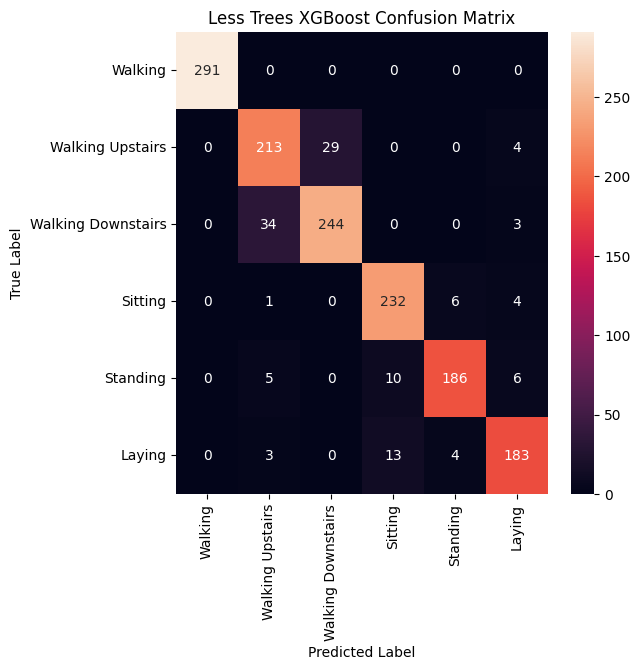

In [33]:
# Confusion matrix for Less Trees
conf_matrix_less_trees = confusion_matrix(y_test_encoded, y_pred_labels_less_trees)
plt.figure(figsize=(6,6))
labels = [class_mapping[i] for i in range(len(class_mapping))]
sns.heatmap(conf_matrix_less_trees, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title("Less Trees XGBoost Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

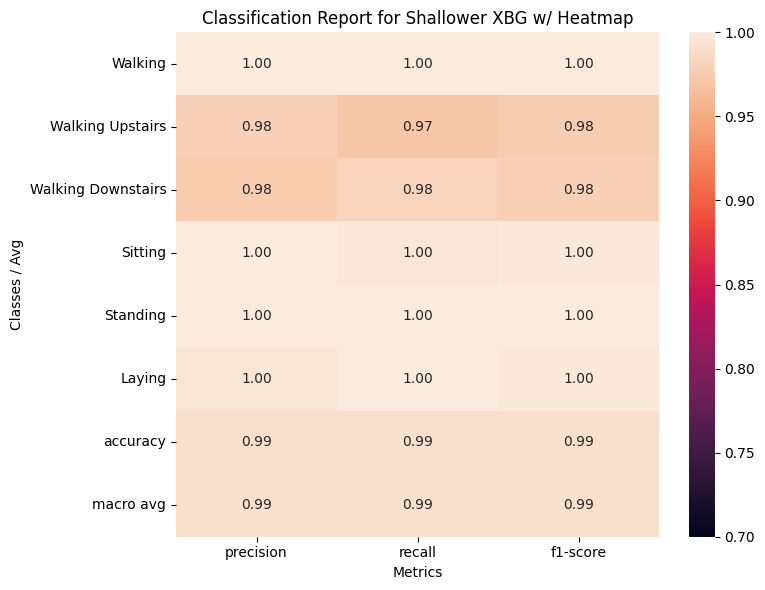

In [34]:
labels = [class_mapping[i] for i in range(len(class_mapping))]
report = classification_report(y_test_encoded, y_pred_labels_shallow, output_dict=True, target_names=labels)
report_df = pd.DataFrame(report).transpose()

# Drop support column (optional)
report_df = report_df.drop(columns=["support"], errors='ignore')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1], annot=True, vmin=0.70, vmax=1.00, fmt='.2f')
plt.title("Classification Report for Shallower XBG w/ Heatmap")
plt.ylabel("Classes / Avg")
plt.xlabel("Metrics")
plt.tight_layout()
plt.show()

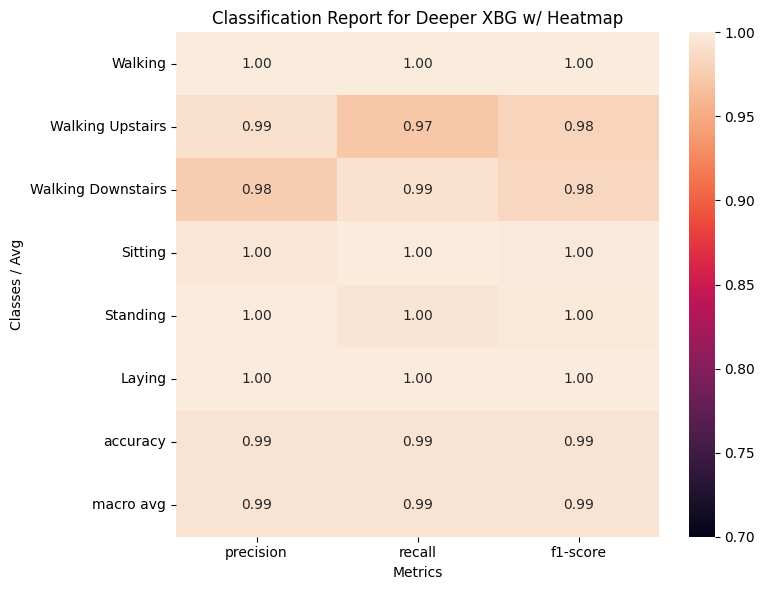

In [35]:
report = classification_report(y_test_encoded, y_pred_labels_deep, output_dict=True, target_names=labels)
report_df = pd.DataFrame(report).transpose()

# Drop support column (optional)
report_df = report_df.drop(columns=["support"], errors='ignore')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1], annot=True, vmin=0.70, vmax=1.00, fmt='.2f')
plt.title("Classification Report for Deeper XBG w/ Heatmap")
plt.ylabel("Classes / Avg")
plt.xlabel("Metrics")
plt.tight_layout()
plt.show()

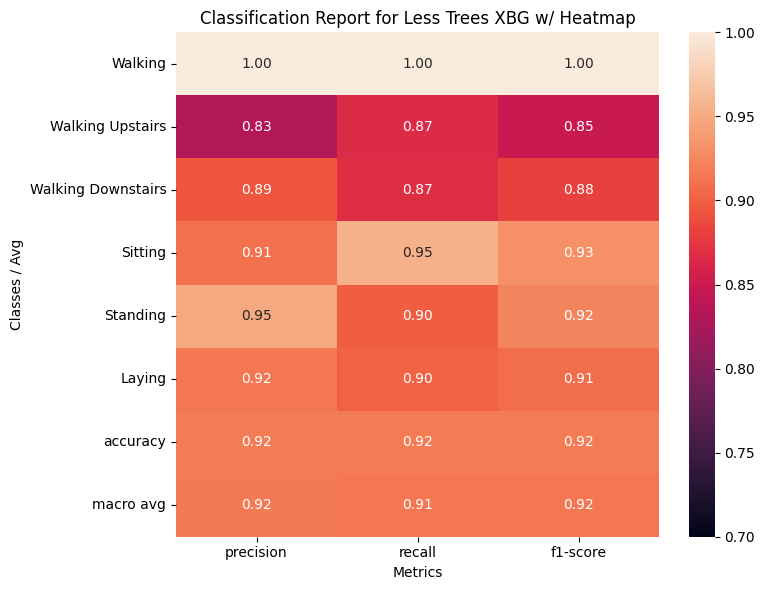

In [36]:
report = classification_report(y_test_encoded, y_pred_labels_less_trees, output_dict=True, target_names=labels)
report_df = pd.DataFrame(report).transpose()

# Drop support column (optional)
report_df = report_df.drop(columns=["support"], errors='ignore')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1], annot=True, vmin=0.70, vmax=1.00, fmt='.2f')
plt.title("Classification Report for Less Trees XBG w/ Heatmap")
plt.ylabel("Classes / Avg")
plt.xlabel("Metrics")
plt.tight_layout()
plt.show()              

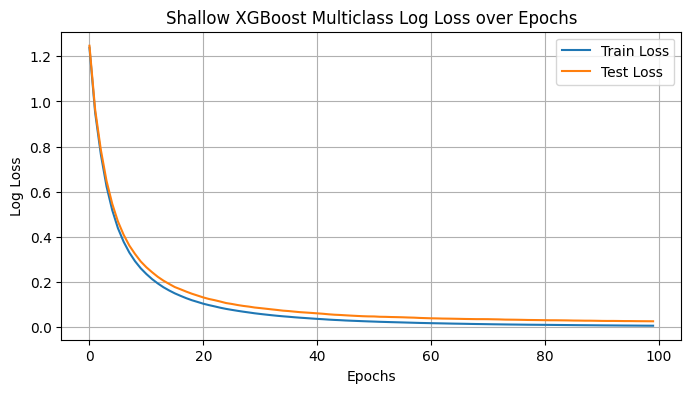

In [37]:
# Plot training and test loss
results = xgb_model_shallow.evals_result()

# Plot loss (logloss)
plt.figure(figsize=(8,4))
plt.plot(results['validation_0']['mlogloss'], label='Train Loss')
plt.plot(results['validation_1']['mlogloss'], label='Test Loss')
plt.title("Shallow XGBoost Multiclass Log Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.show()

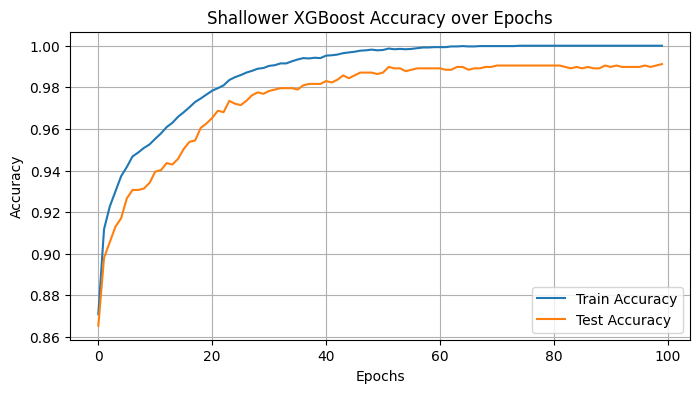

In [38]:
# Plot accuracy
plt.figure(figsize=(8,4))
plt.plot(1 - np.array(results['validation_0']['merror']), label='Train Accuracy')
plt.plot(1 - np.array(results['validation_1']['merror']), label='Test Accuracy')
plt.title("Shallower XGBoost Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

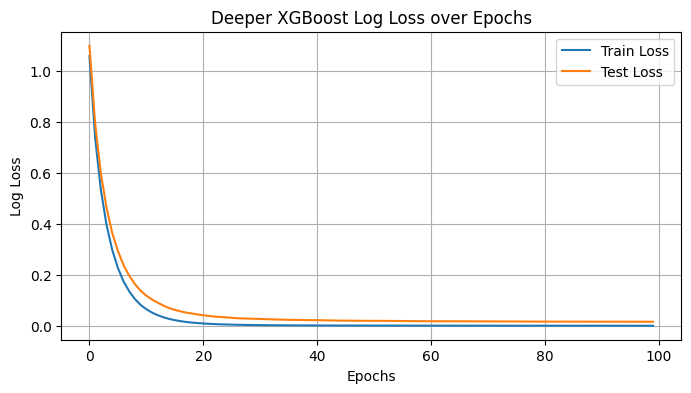

In [39]:
# Plot training and test loss
results = xgb_model_deep.evals_result()

# Plot loss (logloss)
plt.figure(figsize=(8,4))
plt.plot(results['validation_0']['mlogloss'], label='Train Loss')
plt.plot(results['validation_1']['mlogloss'], label='Test Loss')
plt.title("Deeper XGBoost Log Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.show()

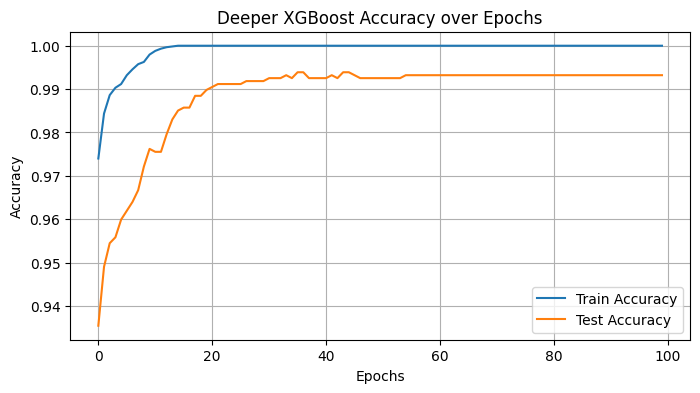

In [40]:
# Plot accuracy
plt.figure(figsize=(8,4))
plt.plot(1 - np.array(results['validation_0']['merror']), label='Train Accuracy')
plt.plot(1 - np.array(results['validation_1']['merror']), label='Test Accuracy')
plt.title("Deeper XGBoost Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

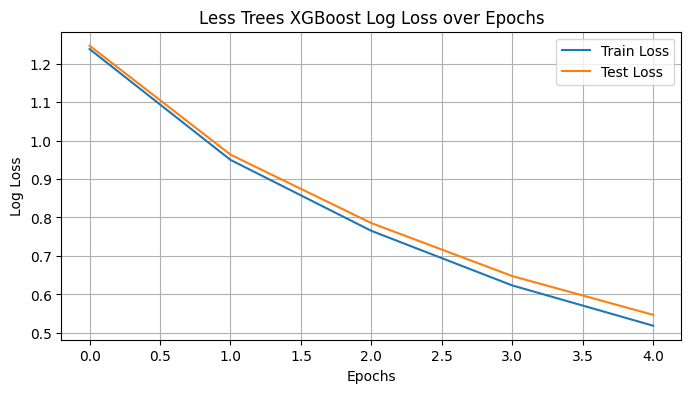

In [41]:
# Plot training and test loss
results = xgb_model_less_trees.evals_result()

# Plot loss (logloss)
plt.figure(figsize=(8,4))
plt.plot(results['validation_0']['mlogloss'], label='Train Loss')
plt.plot(results['validation_1']['mlogloss'], label='Test Loss')
plt.title("Less Trees XGBoost Log Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.show()

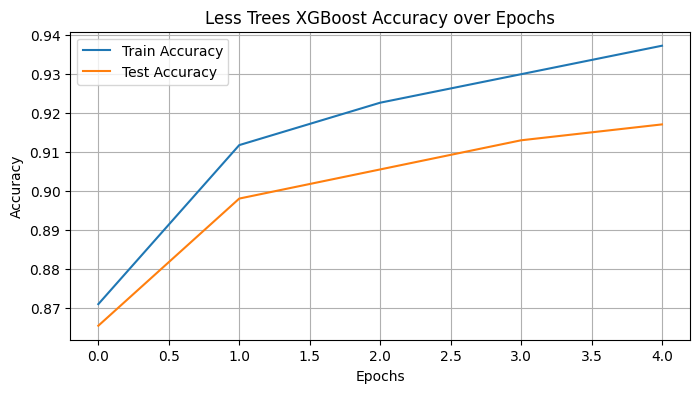

In [42]:
# Plot Accuracy
plt.figure(figsize=(8,4))
plt.plot(1 - np.array(results['validation_0']['merror']), label='Train Accuracy')
plt.plot(1 - np.array(results['validation_1']['merror']), label='Test Accuracy')
plt.title("Less Trees XGBoost Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

While experimenting, similarly to the baseline SVM and MLPs accuracy being extremely high, I noticed right away the Gradient Boosted Tree Model was performing at a very high level (< 95%) without any tuning at all. Because this was "too easy" I decided to set up an experiment to test how much of a difference Tree Depth and the # of trees would make for this problem. I also tried on purpose to see what I could minimize and still retain a good accuracy score. 

The 3 are as follows:
- Less Trees Model -> Depth = 2, # of trees = 5
    - Training Accuracy = 94%
    - Testing Accuracy = 92%
- Shallower Model -> Depth = 2, # of trees = 100
    - Training Accuracy = 100%
    - Testing Accuracy = 99%
- Deeper Model -> Depth = 6, # of trees = 100
    - Training Accuracy = 100%
    - Testing Accuracy = 99%

All of them performed highly, and don't show signs of overfitting, meaning once again we have found a model architecture that is well suited for this problem. This however, is likely due to the simplicity of the dataset more than anything. 

In [43]:
# pip install graphviz

In [ ]:
# MANUALLY SET PATH, WAS HAVING ISSUES WITH GRAPHVIZ

#import os
#os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"


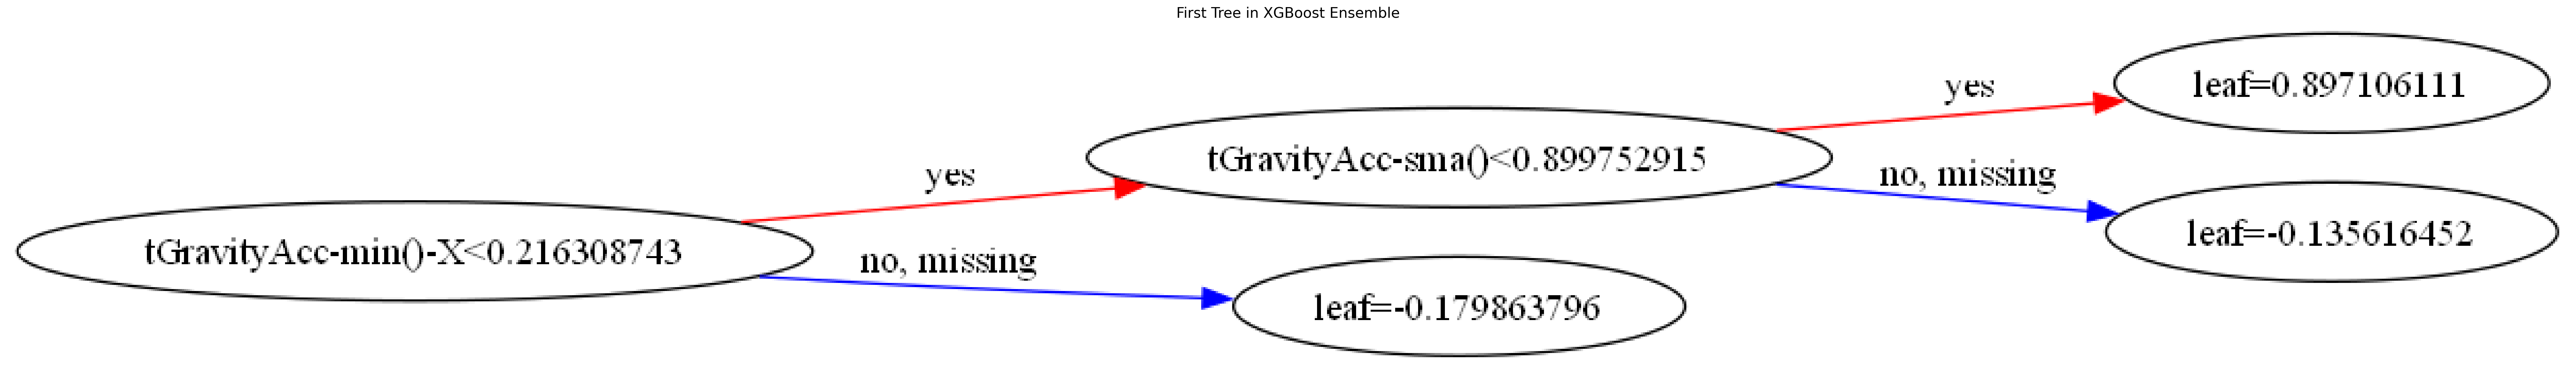

In [49]:
from xgboost import plot_tree

fig, ax = plt.subplots(figsize=(40, 20), dpi=200)  # Bigger size and higher DPI
plot_tree(xgb_model_less_trees, num_trees=0, rankdir='LR', ax=ax)
plt.title("First Tree in XGBoost Ensemble", fontsize=16)
plt.tight_layout()
plt.show()

For fun I wanted to see a an example of what one of the simple trees is doing, and how it makes decisions. This is for the simplest model.